<a href="https://colab.research.google.com/github/mihkuno/GAITZEN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GAITZEN**: Using Physical Features for Projecting Seniors' Average Walking Frequency and Speed

# **Introduction**

#### Definition

"Gait" refers to the pattern of walking, including the stride length, step width, and the overall manner in which a person moves their limbs while walking. It is a complex motor function that involves the coordination of various muscles and joints.

"Zen" on the other hand, is a play on words which refers to senior citizens as the scope of data in this paper.

#### Background

This study is conducted as the final project of our statistics class in the University of Science and Technology of Southern Philippines at the Cagayan De Oro city campus. We were tasked by our teacher Ms. Cheryl Pagal to create a prediction model consisting of many variables called multi-regression to determine one dependent output.

Our initial idea was ought to predict a person's fastest running speed rate based on their height, weight, age, and gender alone. On December 20, 2023, we started to collect data at the university but unfortunately only managed to acquire 4 out of the total 20 required. Getting physical data was difficult due to people uninterested on our study or merely takes their time.

Our last attempt resort to virtually look for datasets online. Most of which had either of the variables missing. We came across complete datasets but of animals and even one for pokemons.

Eventually we stumbled on `github.com/zaidalmahmoud/Gait-Analysis-Dataset` an open source dataset in github without a research paper or more details other than what's in its readme metadata.

#### Objective

This study aims is to assess if there is a relationship between walking speed and frequency of the steps and also predict both variables seperately based on their weight, height, age, and gender.

#### Scope

Due to the uncertainty of the origin of the dataset, this paper's conclusion will only revolve around the methods involving the analysis and fitting of data to the multi-linear regression model rather than major findings surrounding the research title.

#### Literature

##### Examination of anthropometric variables, aerobic capacity, running performance, and energy dynamics in free-living conditions among hill runners.

Involving 28 participants, the research revealed a

- weak negative relationship between lab-assessed VO2 max and age, while

- body fat percentage and skinfold measurements did not significantly correlate with age.

- Hill running performance demonstrated positive associations with greater aerobic capacity and

- negative associations with increases in adiposity and age.

Furthermore, the study highlighted a potential risk of negative energy balance among hill runners, emphasizing the need for nutritional strategies to support the demanding nature of this activity (Lember et al., 2021).


Lember, L.-M., Di Virgilio, T. G., Brown, E. M., & Rodriguez-Sanchez, N. (2021). Hill Runner's Physiology, Performance and Nutrition: A Descriptive Study. Frontiers in Sports and Active Living, 3, 676212. https://doi.org/10.3389/fspor.2021.676212

##### A study aimed to investigate the impact of chronological age and gender on the development of sprint performance in children and adolescents.

Involving 360 sedentary pupils aged between 7 and 18 years, with 15 pupils representing each subgroup.

The findings revealed that
- 18-year-old boys exhibited significantly higher sprint speeds across all measured distances compared to younger boys(15 years old or below).

- 18-year-old girls demonstrated significantly higher speeds at various distances compared to their younger counterparts (13 and 12 years old or below).

- Boys generally outpace girls in all running phases, and the performance disparity between genders widens after the age of 15.

- As children grow older, specifically beyond the age of 15, there is a **notable increase in the performance difference between boys and girls in terms of running speed.**

The study's results emphasize the significance of considering gender and chronological age when evaluating children in terms of sprint performance. Coaches and practitioners should be aware of the observed differences in running speed across developmental ages and genders. These findings contribute valuable insights for optimizing training and performance assessments in youth athletics

Papaiakovou, G., Giannakos, A., Mixailidis, Ch., & Patikas, D. A. (2009). The effect of chronological age and gender on the development of running speed phases during developmental ages. National Strength & Conditioning Association Journal, 23(9), 2568-2573.



# **Methodology**

### **Data Processing**

##### **Source**
Reference a fork of the dataset repository `github.com/zaidalmahmoud/Gait-Analysis-Dataset`

###### Attributes

- Gender
- Age
- Height
- Weight
- Preferred Kilometers Per Hour on Ground
- Cadence on Ground
- Right and Left Measurements:
  - a. Ground Length
  - b. Step Length
  - c. Single Support Time
  - d. Double Support Time
  - e. Time on Ground
  - f. Range of Motion
  - g. Regular Angle Parameters
  - h. Variable Angle Parameters
- Bilateral Regular Angle Parameters
- Bilateral Variable Angle Parameters

###### Metadata

Dataset Characteristics: Multivariate

Attribute Characteristics: Real

Associated Tasks: Classification

Number of instances: 90

Number of independent variables: 162

Number of target variables: 4 (Gender, Age, Height, Weight)

Slow Speed (SS): E – BF (54 Variables)

Average Speed (AS): BG – DH (54 Variables)

Fast Speed (FS): DI – FJ (54 Variables)

Source: JEIOS Ltd

##### **Acquire**
Retrieve dataset and create dataframe object

In [16]:
import pandas as pd

# link of the dataset
url = "https://raw.githubusercontent.com/mihkuno/GAITZEN/main/dataset.csv"

# dataframe object
df = pd.read_csv(url)

df # view dataframe

,Gender,Age,Height,Weight,PrefKPH_GND_SS,CDS_GND_SS,L_SGNDLEN_GND_SS,L_STPLEN_GND_SS,L_SNGSPT_GND_SS,L_DBLSPT_GND_SS,...,R_VAR_SI_GND_FS,R_VAR_IE_GND_FS,R_VAR_DP_GND_FS,R_VAR_AA_GND_FS,B_VAR_AP_GND_FS,B_VAR_ML_GND_FS,B_VAR_SI_GND_FS,B_VAR_IE_GND_FS,B_VAR_DP_GND_FS,B_VAR_AA_GND_FS
0,M,66,158.0,54.0,3.3,119,1.01,0.50,39.33,19.62,...,3.8984,3.8028,1.5339,6.6394,1.8894,3.9906,3.2485,4.5469,1.6741,14.9030
1,M,66,171.9,73.7,4.4,137,1.21,0.60,40.03,19.22,...,2.8327,12.8902,1.3034,17.1550,2.8590,15.1474,1.3586,6.1587,0.6410,7.6523
2,M,60,168.6,62.5,3.3,109,1.13,0.56,39.21,22.04,...,1.9003,20.2697,0.9361,9.5596,4.4771,8.0268,4.0376,13.0542,0.7616,15.4088
3,F,66,152.6,53.1,4.0,117,1.27,0.63,41.50,17.75,...,1.6152,6.3113,0.5563,12.4059,1.6838,13.7956,2.0517,4.9787,1.0960,20.9710
4,F,66,150.0,51.0,4.0,118,1.28,0.64,41.86,16.65,...,9.4975,3.7412,1.3942,20.6627,2.4911,2.4503,4.2872,2.8052,1.2295,8.2799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,F,77,157.0,60.0,3.6,97,1.93,0.96,38.12,21.53,...,1.6860,0.8560,1.0630,5.8790,4.5930,14.0780,11.2260,3.9130,5.1890,17.3520
86,M,71,164.0,67.0,3.7,109,1.39,0.69,40.45,16.15,...,6.2610,0.9840,2.6910,13.7250,1.2200,4.7650,3.8770,3.8600,0.8810,12.3990
87,F,75,165.0,60.0,3.4,114,1.45,0.73,37.72,24.78,...,3.2840,10.0050,1.6580,15.3720,2.3060,7.2250,0.8250,11.7910,0.6820,12.3390
88,F,68,150.0,57.0,4.2,124,1.24,0.62,40.23,20.06,...,2.0288,5.1932,0.5063,4.3018,1.9651,6.8944,1.5353,3.6836,0.5116,16.4578


##### **Filter**
The dataframe will be filtered on the following attributes

Independent:
- AGE
- GENDER
- HEIGHT
- WEIGHT

Dependent:
- AVG_RATE: Average Walking Speed
- AVG_FREQ: Average Walking Frequency

In [17]:
filter = [
  'Age',
  'Gender',
  'Height',
  'Weight',
  'PrefKPH_GND_AS',
  'CDS_GND_AS'
]

columns = {
  filter[0]: 'AGE',
  filter[1]: 'GENDER',
  filter[2]: 'HEIGHT',
  filter[3]: 'WEIGHT',
  filter[4]: 'AVG_RATE',
  filter[5]: 'AVG_FREQ'
}

# filter columns
df = df[filter]

# rename columns
df = df.rename(columns=columns)

df # view dataframe

,AGE,GENDER,HEIGHT,WEIGHT,AVG_RATE,AVG_FREQ
0,66,M,158.0,54.0,3.6,129
1,66,M,171.9,73.7,5.7,138
2,60,M,168.6,62.5,4.4,124
3,66,F,152.6,53.1,4.4,125
4,66,F,150.0,51.0,4.4,126
...,...,...,...,...,...,...
85,77,F,157.0,60.0,3.9,112
86,71,M,164.0,67.0,4.3,122
87,75,F,165.0,60.0,3.5,117
88,68,F,150.0,57.0,4.5,128


##### **Split**

Split the dataframe into train and test

There is a total of 90 records in the dataset.

**Train**: random sample of 70

**Test**: remaining sample of 20

In [18]:
# random sample of 70 rows
train = df.sample(n=70, random_state=42)  # You can adjust the random_state for reproducibility

# remaining excluded rows
test = df.loc[~df.index.isin(train.index)]

In [19]:
# display the length
len(train), len(test), len(df)

(70, 20, 90)

In [20]:
train # view dataframe

,AGE,GENDER,HEIGHT,WEIGHT,AVG_RATE,AVG_FREQ
40,74,F,160.0,65.0,3.2,136
22,60,F,147.7,52.0,3.6,120
55,77,F,150.0,50.0,4.8,133
70,81,M,165.0,69.0,4.2,114
0,66,M,158.0,54.0,3.6,129
...,...,...,...,...,...,...
41,68,F,146.0,62.0,3.6,130
58,73,F,168.0,65.0,2.5,107
48,77,M,165.0,66.0,3.3,123
79,65,F,161.0,51.0,4.5,117


In [21]:
test # view dataframe

,AGE,GENDER,HEIGHT,WEIGHT,AVG_RATE,AVG_FREQ
1,66,M,171.9,73.7,5.7,138
2,60,M,168.6,62.5,4.4,124
14,70,M,166.7,58.3,5.0,129
20,79,M,162.6,62.4,4.4,130
21,78,M,150.0,48.0,3.6,120
23,70,M,161.0,58.0,4.4,128
29,77,M,170.0,78.0,3.3,129
32,60,M,161.0,81.3,5.0,129
37,71,F,147.0,46.0,4.5,138
51,75,F,149.0,49.0,3.9,118


### **Data Analysis**

In [22]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("https://raw.githubusercontent.com/mihkuno/GAITZEN/main/theme.mplstyle")

##### Relationship of Walk Speed and Frequency

In summary, there is a **moderate positive correlation** on speed and the amount of steps taken when walking.

In [23]:
# calculate the correlation coefficient
corr = df['AVG_RATE'].corr(df['AVG_FREQ'])
corr

0.5862286734828879

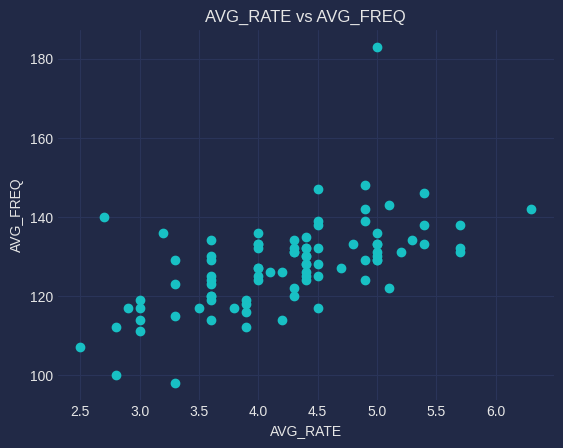

In [24]:
# scatter plot of the correlation
plt.scatter(df['AVG_RATE'], df['AVG_FREQ'])
plt.title('AVG_RATE vs AVG_FREQ')
plt.xlabel('AVG_RATE')
plt.ylabel('AVG_FREQ')
plt.show()

##### Relationship of IV and D

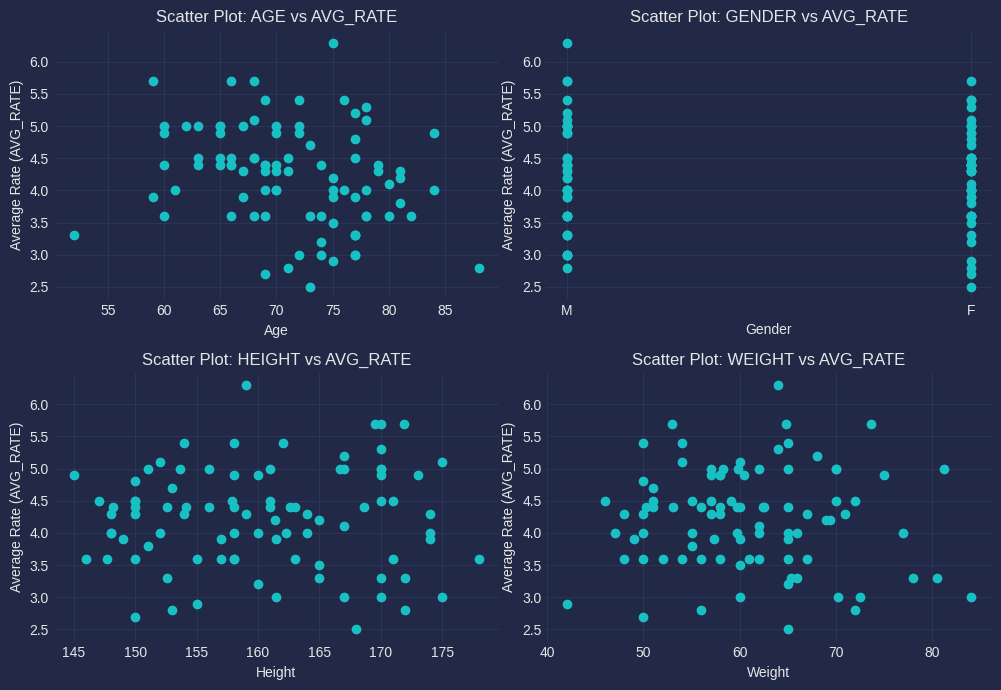

In [25]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Scatter plot for AGE
axes[0, 0].scatter(df['AGE'], df['AVG_RATE'])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Average Rate (AVG_RATE)')
axes[0, 0].set_title('Scatter Plot: AGE vs AVG_RATE')

# Scatter plot for GENDER
axes[0, 1].scatter(df['GENDER'], df['AVG_RATE'])
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Rate (AVG_RATE)')
axes[0, 1].set_title('Scatter Plot: GENDER vs AVG_RATE')

# Scatter plot for HEIGHT
axes[1, 0].scatter(df['HEIGHT'], df['AVG_RATE'])
axes[1, 0].set_xlabel('Height')
axes[1, 0].set_ylabel('Average Rate (AVG_RATE)')
axes[1, 0].set_title('Scatter Plot: HEIGHT vs AVG_RATE')

# Scatter plot for WEIGHT
axes[1, 1].scatter(df['WEIGHT'], df['AVG_RATE'])
axes[1, 1].set_xlabel('Weight')
axes[1, 1].set_ylabel('Average Rate (AVG_RATE)')
axes[1, 1].set_title('Scatter Plot: WEIGHT vs AVG_RATE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# **Conclusion**

There seems to be no relationship with the assumed physical independent variables and the rate of walking.